In [50]:
import mlrose_hiive

import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


## Simulated Annealing (sa)
* iteration: 1500
* max_attempts: 50 (Knapsack:200) 
* decay_init_temp: 1.0
* decay_type: Exponetial

### Flip Flop (input_size=25)

In [70]:
fitness_name = 'flipflop'
alg_name = 'sa'
df_run_stats = pd.read_csv('./output/{0}/{1}__{0}__run_stats_df.csv'.format(fitness_name, alg_name))
df_run_curves = pd.read_csv('./output/{0}/{1}__{0}__curves_df.csv'.format(fitness_name, alg_name))

if ('Unnamed: 0' in df_run_stats.keys()):
        df_run_stats.pop('Unnamed: 0')
        
if ('Unnamed: 0' in df_run_curves.keys()):
        df_run_curves.pop('Unnamed: 0')
        
print(df_run_stats.shape, df_run_curves.shape)

(112, 12) (13190, 5)


In [71]:
df_run_stats.head(1)

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_decay
0,0,12.0,0.000118,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...",exponential,1.0,0.005,0.001,0.999999,1.0,4096,NaN


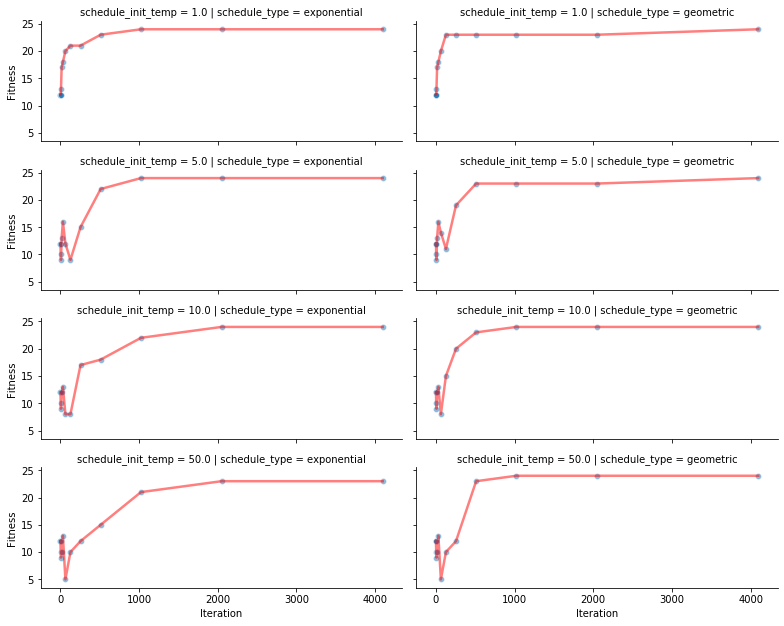

In [72]:
# data = df_run_stats[df_run_stats['schedule_type']==geometric]
grid = sns.FacetGrid(df_run_stats, row='schedule_init_temp', col='schedule_type', size=2.2, aspect=2.5)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)
# grid.add_legend()

In [54]:
for i in df_run_stats['schedule_type'].unique():
    df = df_run_stats[df_run_stats['schedule_type']==i]
    for j in df['schedule_init_temp'].unique():
        max_f = df[df['schedule_init_temp']==j]['Fitness'].max()
        print (i, j, max_f)

exponential 1.0 24.0
exponential 5.0 24.0
exponential 10.0 24.0
exponential 50.0 23.0
geometric 1.0 24.0
geometric 5.0 24.0
geometric 10.0 24.0
geometric 50.0 24.0


In [55]:
df_run_curves.head()

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000118,12.0,1.0,4096
1,1,0.000541,12.0,1.0,4096
2,2,0.004217,12.0,1.0,4096
3,3,0.007559,12.0,1.0,4096
4,4,0.007686,13.0,1.0,4096


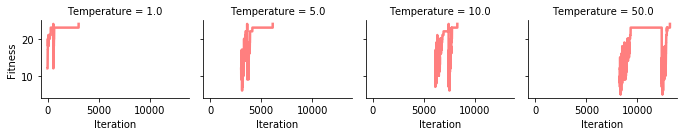

In [56]:
grid = sns.FacetGrid(df_run_curves, col='Temperature', size=2, aspect=1.2)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
# grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)

### Four Peaks (input_size=50)

In [92]:
fitness_name = '4peaks'
alg_name = 'sa'
df_run_stats = pd.read_csv('./output/{0}/{1}__{0}__run_stats_df.csv'.format(fitness_name, alg_name))
df_run_curves = pd.read_csv('./output/{0}/{1}__{0}__curves_df.csv'.format(fitness_name, alg_name))

if ('Unnamed: 0' in df_run_stats.keys()):
        df_run_stats.pop('Unnamed: 0')
        
if ('Unnamed: 0' in df_run_curves.keys()):
        df_run_curves.pop('Unnamed: 0')
        
print(df_run_stats.shape, df_run_curves.shape)

(112, 12) (14284, 5)


In [93]:
df_run_stats.head(1)

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_decay
0,0,2.0,0.000085,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...",exponential,1,0.005,0.001,1.0,1,4096,NaN


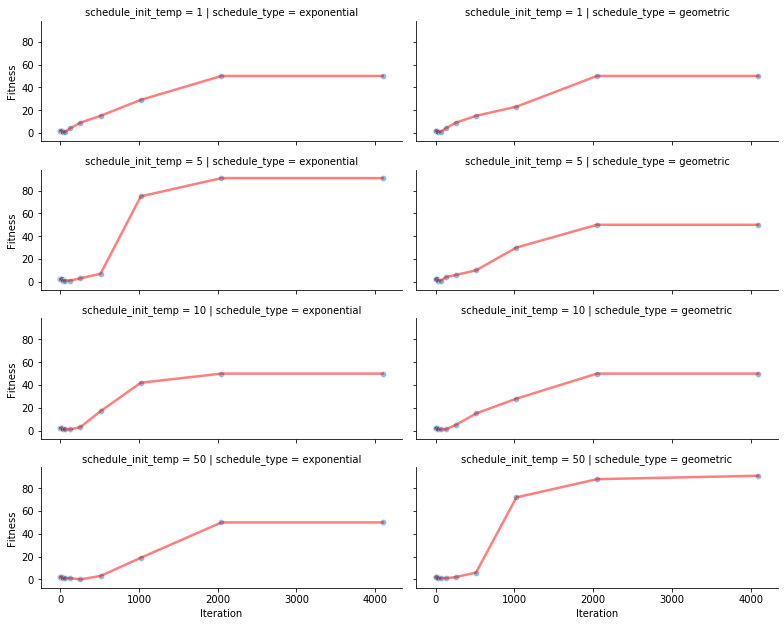

In [94]:
# data = df_run_stats[df_run_stats['schedule_type']==geometric]
grid = sns.FacetGrid(df_run_stats, row='schedule_init_temp', col='schedule_type', size=2.2, aspect=2.5)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)
# grid.add_legend()

In [95]:
for i in df_run_stats['schedule_type'].unique():
    df = df_run_stats[df_run_stats['schedule_type']==i]
    for j in df['schedule_init_temp'].unique():
        max_fit = df[df['schedule_init_temp']==j]['Fitness']
        max_val = max_fit.max()
        max_count = max_fit.count()
        print (i, j, max_val)

exponential 1 50.0
exponential 5 91.0
exponential 10 50.0
exponential 50 50.0
geometric 1 50.0
geometric 5 50.0
geometric 10 50.0
geometric 50 91.0


In [61]:
df = df_run_stats[df_run_stats['schedule_type']==i]
df['schedule_init_temp'].unique()

array([ 1,  5, 10, 50])

In [62]:
df_run_curves.head()

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000097,2.0,1,4096
1,1,0.000391,2.0,1,4096
2,2,0.004402,2.0,1,4096
3,3,0.007581,2.0,1,4096
4,4,0.007642,2.0,1,4096


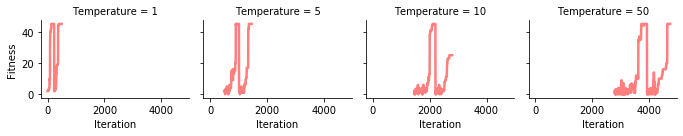

In [63]:
grid = sns.FacetGrid(df_run_curves, col='Temperature', size=2, aspect=1.2)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
# grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)

### Knapsack (input_size=25)
* iteration_list=2 ** np.arange(13),
* decay_list=[mlrose_hiive.ExpDecay, mlrose_hiive.GeomDecay],
* temperature_list=[1, 10, 50, 100],
* max_attempts=200)

In [80]:
fitness_name = 'knapsack'
alg_name = 'sa'
df_run_stats = pd.read_csv('./output/{0}/{1}__{0}__run_stats_df.csv'.format(fitness_name, alg_name))
df_run_curves = pd.read_csv('./output/{0}/{1}__{0}__curves_df.csv'.format(fitness_name, alg_name))

if ('Unnamed: 0' in df_run_stats.keys()):
        df_run_stats.pop('Unnamed: 0')
        
if ('Unnamed: 0' in df_run_curves.keys()):
        df_run_curves.pop('Unnamed: 0')
        
print(df_run_stats.shape, df_run_curves.shape)

(112, 12) (4301, 5)


In [81]:
df_run_stats.head(1)

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_decay
0,0,124.0,0.00007,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, ...",exponential,1.0,0.005,0.001,1.0,1.0,4096,NaN


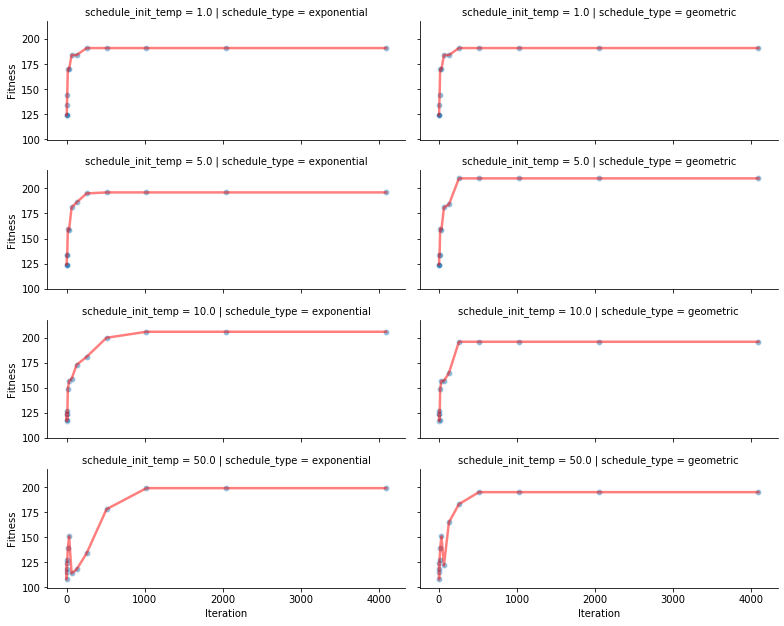

In [82]:
# data = df_run_stats[df_run_stats['schedule_type']==geometric]
grid = sns.FacetGrid(df_run_stats, row='schedule_init_temp', col='schedule_type', size=2.2, aspect=2.5)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)
# grid.add_legend()

In [83]:
for i in df_run_stats['schedule_type'].unique():
    df = df_run_stats[df_run_stats['schedule_type']==i]
    for j in df['schedule_init_temp'].unique():
        max_f = df[df['schedule_init_temp']==j]['Fitness'].max()
        print (i, j, max_f)

exponential 1.0 191.0
exponential 5.0 196.0
exponential 10.0 206.0
exponential 50.0 199.0
geometric 1.0 191.0
geometric 5.0 210.0
geometric 10.0 196.0
geometric 50.0 195.0


In [68]:
df_run_curves.head()

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000067,82.0,1.0,4096
1,1,0.000365,82.0,1.0,4096
2,2,0.003791,88.0,1.0,4096
3,3,0.006980,88.0,1.0,4096
4,4,0.007052,88.0,1.0,4096


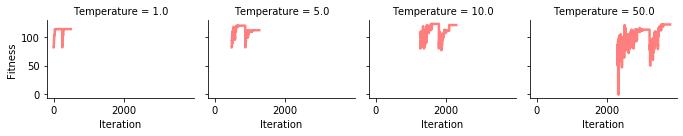

In [69]:
grid = sns.FacetGrid(df_run_curves, col='Temperature', size=2, aspect=1.2)
grid.map(sns.lineplot, 'Iteration', 'Fitness', alpha=.5, color='red', linewidth=2.5)
# grid.map(sns.scatterplot, 'Iteration', 'Fitness', alpha=.5)